## Cardiovascular Risk Prediction in Cleveland Population: A Predictive Analysis of Heart Disease Occurrence

## Introduction

Coronary diseases pose significant challenges to everyday wellbeing, requiring precise predictive models where understanding diagnostic factors is crucial. Utilizing a dataset of clinical test results and cardiovascular diagnosis, this analysis focuses on the relationship between age, maximum heart rate, and diagnosis levels in Cleveland. The unique healthcare landscape and lifestyle factors make this exploration essential for tailored interventions and improved cardiovascular risk assessment in the Cleveland population. Thus, this project will explore the following: Can maximum heart rate and age be used to predict heart disease in Clevelanders?

This analysis' heart disease dataset is from a database created to test a discriminant function model, developed using clinical and noninvasive test results from patients undergoing angiography. Collected from groups in Hungary, Switzerland, Long Beach, and Cleveland, the database encompasses variables including demographics, chest pain, resting blood pressure, cholesterol levels, maximum heart rate and other relevant features for diagnosis. The proposed model focuses on the dataset of 303 Cleveland Clinic patients. 

## Methods and Results

In [2]:
# load all necessary libraries
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

### Preliminary analysis

In [3]:
# downloading and reading data, naming columns
url <- "https://raw.githubusercontent.com/ssun05/dsci_100_002_group5_project/main/processed.cleveland.data"
heart_data <- read_csv(url, col_names = c("age", "sex", "chest_pain", "trestbps", "chol", "fasting_bld_sgar",
                                                      "restecg", "max_heart_rate", "exerc_angina", "oldpeak", "slope", "ca", "thal", "diagnosis"))

heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, chest_pain, trestbps, chol, fasting_bld_sgar, restecg, m...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain,trestbps,chol,fasting_bld_sgar,restecg,max_heart_rate,exerc_angina,oldpeak,slope,ca,thal,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [4]:
# filter for males and reclass diagnosis as factor, make labels understandable
heart_data_renamed <- heart_data |> 
                    mutate(diagnosis = as_factor(diagnosis)) |>
                    mutate(diagnosis = fct_recode(diagnosis, "no" = "0", "yes" = "1", "yes" = "2", "yes" = "3", "yes" = "4"))

heart_data_renamed

age,sex,chest_pain,trestbps,chol,fasting_bld_sgar,restecg,max_heart_rate,exerc_angina,oldpeak,slope,ca,thal,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,no
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,yes
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,yes
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,yes
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,no


In [9]:
set.seed(1234)
heart_split <- initial_split(heart_data_renamed, prop = 0.75, strata = diagnosis)

heart_train <- training(heart_split)
heart_test <- testing(heart_split)

In [10]:
# table of diagnosis counts
label_counts <- heart_train |>
                group_by(diagnosis) |>
                summarize(count = n())
label_counts

missing_data <- heart_train |> 
                filter(age == NA | max_heart_rate == NA | diagnosis == NA |
                       age == "?" | max_heart_rate == "?" | diagnosis == "?") |>
                    summarize(missing_data = n())

missing_data

diagnosis,count
<fct>,<int>
no,123
yes,104


missing_data
<int>
0


diagnosis,mean_heart
<fct>,<dbl>
no,157.4797
yes,139.0673


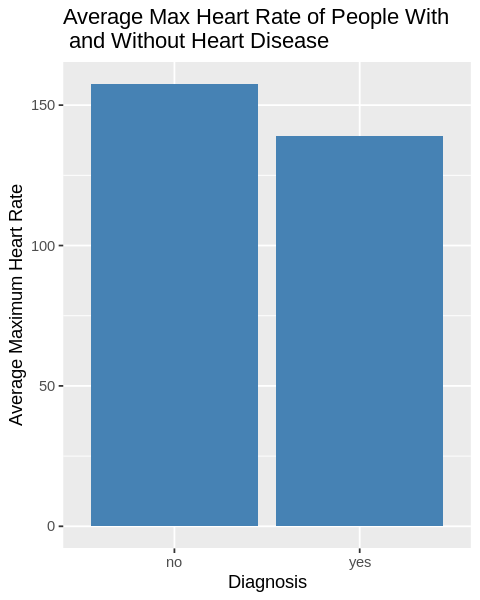

In [11]:
# predictor mean: heart rate
mean_max_hrt_rate <- heart_train |>
                        group_by(diagnosis) |>
                        summarize(mean_heart = mean(max_heart_rate))

mean_max_hrt_rate

options(repr.plot.width = 4, repr.plot.height = 5)
avg_hrt_plot <- mean_max_hrt_rate |> 
                ggplot(aes(x = diagnosis, y = mean_heart)) +
                geom_bar(stat = "identity", fill = "steelblue") +
                labs(x = "Diagnosis", y = "Average Maximum Heart Rate") +
                ggtitle("Average Max Heart Rate of People With \n and Without Heart Disease")

avg_hrt_plot

diagnosis,mean_age
<fct>,<dbl>
no,52.48780
yes,56.94231


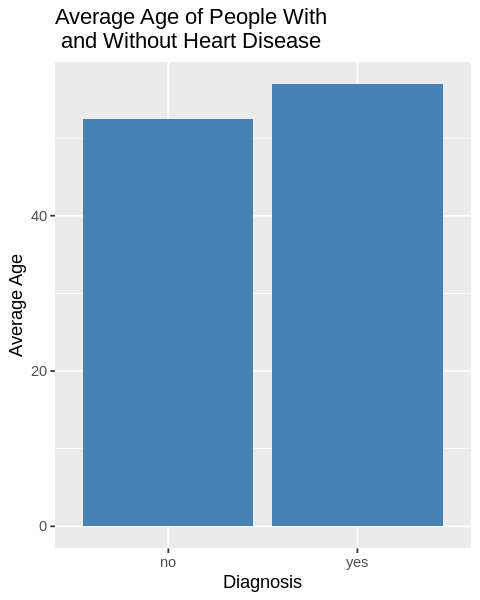

In [13]:
# predictor mean: age
mean_age <- heart_train |>
                group_by(diagnosis) |>
                summarize(mean_age = mean(age))

mean_age

options(repr.plot.width = 4, repr.plot.height = 5)
avg_hrt_plot <- mean_age |> 
                ggplot(aes(x = diagnosis, y = mean_age)) +
                geom_bar(stat = "identity", fill = "steelblue") +
                labs(x = "Diagnosis", y = "Average Age") +
                ggtitle("Average Age of People With \n and Without Heart Disease")

avg_hrt_plot

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 4)

heart_plot <- heart_train|> 
                ggplot(aes(x = age, y = max_heart_rate, color = diagnosis)) +
                geom_point() +
                labs(x = "Age (Years)",
                     y = "Max Heart Rate (BPM)",
                     color = "Has Heart Diagnosis?",
                     title = "Max Heart Rate vs. Age vs. Heart Diagnosis?")

heart_plot

options(repr.plot.width = 8, repr.plot.height = 4)

age_distribution <- heart_train|> 
                ggplot(aes(x = age)) +
                geom_histogram() +
                labs(x = "Age (Years)",
                     y = "Count",
                     title = "Age Distribution vs. Heart Diagnosis?") +
                facet_grid(cols = vars(diagnosis))

age_distribution

max_distribution <- heart_train|> 
                ggplot(aes(x = max_heart_rate)) +
                geom_histogram(binwidth = 3) +
                labs(x = "Max Heart Rate (BPM)",
                     y = "Count",
                     title = "Max Heart Rate Distribution vs. Heart Diagnosis?") +
                facet_grid(cols = vars(diagnosis))

max_distribution